In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# GridSearchCV

In [90]:
df = pd.read_csv('data/pacific_cleaned.csv')

In [91]:
df.columns

Index(['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude',
       'Longitude', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW'],
      dtype='object')

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

df['Next_Latitude'] = df['Latitude'].shift(-1)
df['Next_Longitude'] = df['Longitude'].shift(-1)

# Drop any NaN values
df = df.dropna()

#X = data.drop(columns=['targ_var'])
X = df[['Latitude', 'Longitude']]
#y = data['targ_var']
y = df[['Next_Latitude', 'Next_Longitude']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [96]:
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

Best parameters:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


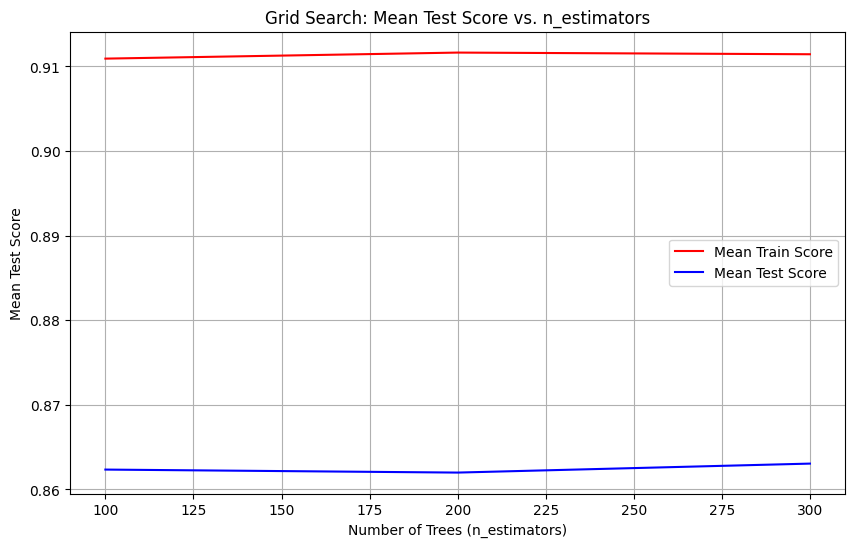

In [106]:
best_params = grid_search.best_params_
grid_scores = grid_search.cv_results_
print("Best parameters: ", best_params)

filtered_scores = []
for i in range(len(grid_scores['params'])):
    if all(grid_scores['params'][i][k] == best_params[k] 
           for k in best_params if k != 'n_estimators'):
        filtered_scores.append((grid_scores['params'][i]['n_estimators'], grid_scores['mean_test_score'][i]))

filtered_scores_2 = []
for i in range(len(grid_scores['params'])):
    if all(grid_scores['params'][i][k] == best_params[k] 
           for k in best_params if k != 'n_estimators'):
        filtered_scores_2.append((grid_scores['params'][i]['n_estimators'], grid_scores['mean_train_score'][i]))

filtered_scores.sort(key=lambda x: x[0])
filtered_scores_2.sort(key=lambda x: x[0])

n_estimators, mean_test_scores = zip(*filtered_scores)
n_estimators, mean_train_scores = zip(*filtered_scores_2)

plt.figure(figsize=(10, 6))
plt.plot(n_estimators, mean_train_scores, label='Mean Train Score', color='red')
plt.plot(n_estimators, mean_test_scores, label='Mean Test Score', color='blue')

plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Mean Test Score')
plt.title('Grid Search: Mean Test Score vs. n_estimators')
plt.legend(loc='best')
plt.grid()
plt.show()